# Project: Investigating Soccer Match Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> I chose to analyze the Soccer Database from Kaggle. The Soccer Database contains a lot of information from player rankings, team rankings, and match results from leagues around the world. In order to perform and take an in depth look at the database, I narrowed my analysis to the Premier League. Once I had narrowed to the premier league, the matches really stood out to me. I sought out to answer the questions of which team had improved the most and if scoring more goals per game leads to winning games at a higher rate?

In [1]:
# Use this cell to set up import statements for all of the packages that you
# plan to use.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

> In order to begin wrangling the data together, I had to use an sql join in order to get the data that I wanted to start wrangling. After the tables were put together, I read them in and looked to make sure everything copied over correctly.

In [2]:
match_results = pd.read_csv("match_results.csv")
match_results.head()

,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,2008/2009,10260,10261,1,1
1,2008/2009,9825,8659,1,0
2,2008/2009,8472,8650,0,1
3,2008/2009,8654,8528,2,1
4,2008/2009,10252,8456,4,2


> After looking at the dataframe's structure I performed a .info() on the dataframe in order to see if there were any NaN values. There did not appear to be any NaN values, so I do not need to handle any missing data.

In [3]:
match_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3040 entries, 0 to 3039
Data columns (total 5 columns):
season              3040 non-null object
home_team_api_id    3040 non-null int64
away_team_api_id    3040 non-null int64
home_team_goal      3040 non-null int64
away_team_goal      3040 non-null int64
dtypes: int64(4), object(1)
memory usage: 118.8+ KB


In [4]:
team = pd.read_csv("Team.csv")
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


> After looking at the general structure of the dataframe, I wanted to see if I would run into any NaN values. I found using .info() there are some missing team_fifa_api_id which is not a problem as I will just use the team_api_id and team_long_name to fill in the match data.

In [5]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
id                  299 non-null int64
team_api_id         299 non-null int64
team_fifa_api_id    288 non-null float64
team_long_name      299 non-null object
team_short_name     299 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


### Data Cleaning (Replace this with more specific notes!)

> Reading the data in started the process, now I had to organize the match data and create useful columns for analysis.

In [6]:
winning_team = np.repeat('NaN',len(match_results.index))
match_results['winning_team'] = winning_team
match_results.head()

,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,winning_team
0,2008/2009,10260,10261,1,1,NaN
1,2008/2009,9825,8659,1,0,NaN
2,2008/2009,8472,8650,0,1,NaN
3,2008/2009,8654,8528,2,1,NaN
4,2008/2009,10252,8456,4,2,NaN


> The columns labeled 'home_team_api_id' and 'away_team_api_id' provided a unique identifier to the team that played, however I wanted to replace it with the team name that was provided in the team dataframe.

In [7]:
team_array = dict(zip(team['team_api_id'],team['team_long_name']))
match_results['home_team_api_id'].replace(team_array,inplace=True)
match_results['away_team_api_id'].replace(team_array,inplace=True)
match_results.rename(columns = {'home_team_api_id':'home_team_name', 'away_team_api_id':'away_team_name'}, inplace=True)
match_results.head()

,season,home_team_name,away_team_name,home_team_goal,away_team_goal,winning_team
0,2008/2009,Manchester United,Newcastle United,1,1,NaN
1,2008/2009,Arsenal,West Bromwich Albion,1,0,NaN
2,2008/2009,Sunderland,Liverpool,0,1,NaN
3,2008/2009,West Ham United,Wigan Athletic,2,1,NaN
4,2008/2009,Aston Villa,Manchester City,4,2,NaN


> Once the team names were in place I needed to fill in the 'winning_team' column in order to answer the questions I want to analyze.

In [8]:
for index in range(len(match_results['winning_team']) - 1):
    if match_results['home_team_goal'].iloc[index] > match_results['away_team_goal'].iloc[index]:
        match_results.at[index,'winning_team'] = match_results['home_team_name'].iloc[index]
    elif match_results['home_team_goal'].iloc[index] < match_results['away_team_goal'].iloc[index]:
         match_results.at[index,'winning_team'] = match_results['away_team_name'].iloc[index]
    else:
        match_results.at[index,'winning_team'] = 'draw'
match_results.head()

,season,home_team_name,away_team_name,home_team_goal,away_team_goal,winning_team
0,2008/2009,Manchester United,Newcastle United,1,1,draw
1,2008/2009,Arsenal,West Bromwich Albion,1,0,Arsenal
2,2008/2009,Sunderland,Liverpool,0,1,Liverpool
3,2008/2009,West Ham United,Wigan Athletic,2,1,West Ham United
4,2008/2009,Aston Villa,Manchester City,4,2,Aston Villa


> The winning_team data is useful for both of my research questions, but the goals are only useful for one of the questions. In order to tidy the data I dropped the goals columns to better analyze my first question.

In [9]:
season_results = match_results.drop(columns={'home_team_goal','away_team_goal'})
season_results.head()

,season,home_team_name,away_team_name,winning_team
0,2008/2009,Manchester United,Newcastle United,draw
1,2008/2009,Arsenal,West Bromwich Albion,Arsenal
2,2008/2009,Sunderland,Liverpool,Liverpool
3,2008/2009,West Ham United,Wigan Athletic,West Ham United
4,2008/2009,Aston Villa,Manchester City,Aston Villa


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Which team improved the most over the given data set?

> To better look at improvement I did not want to be too broad, so I broke the data down by seasons.

In [10]:
season_results['season'].unique()

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

In [11]:
df_0809_temp = season_results.query('season == "2008/2009"')
league_data = df_0809_temp['home_team_name'].value_counts() + df_0809_temp['away_team_name'].value_counts()
league_data = pd.DataFrame(league_data)
league_data.columns = ['games_played']
league_data.head()

,games_played
Arsenal,38
Aston Villa,38
Blackburn Rovers,38
Bolton Wanderers,38
Chelsea,38


> After querying by seaon, I wanted to make sure the data could not be skewed by number of games, so it was best to go by win percentage and not total games won. I made a new column of 'games_won' by counting the winning team column for the season.

In [12]:
df_0809_temp = df_0809_temp.query('winning_team != "draw"')
league_data['games_won'] = df_0809_temp['winning_team'].value_counts()
league_data['win_%_0809'] = league_data['games_won'] / league_data['games_played']
league_data.head()

,games_played,games_won,win_%_0809
Arsenal,38,20,0.526316
Aston Villa,38,17,0.447368
Blackburn Rovers,38,10,0.263158
Bolton Wanderers,38,11,0.289474
Chelsea,38,25,0.657895


> I then dropped the not useful columns to make the data tidier.

In [13]:
league_data.drop(columns={'games_played','games_won'}, inplace=True)
league_data.head()

,win_%_0809
Arsenal,0.526316
Aston Villa,0.447368
Blackburn Rovers,0.263158
Bolton Wanderers,0.289474
Chelsea,0.657895


> Then I proceeded to follow the same steps for the rest of the seasons.

In [14]:
def reset_dataFrame(temp):
    temp = pd.DataFrame(None)
    return temp

In [15]:
df_0910_temp = season_results.query('season == "2009/2010"')
temp = df_0910_temp['home_team_name'].value_counts() + df_0910_temp['away_team_name'].value_counts()
temp = pd.DataFrame(temp)
temp.columns = ['games_played']
df_0910_temp = df_0910_temp.query('winning_team != "draw"')
temp['games_won'] = df_0910_temp['winning_team'].value_counts()
temp['win_%_0910'] = temp['games_won'] / temp['games_played']
league_data['win_%_0910'] = temp['win_%_0910']
league_data.head()

,win_%_0809,win_%_0910
Arsenal,0.526316,0.605263
Aston Villa,0.447368,0.447368
Blackburn Rovers,0.263158,0.342105
Bolton Wanderers,0.289474,0.263158
Chelsea,0.657895,0.710526


In [16]:
reset_dataFrame(temp)
df_1011_temp = season_results.query('season == "2010/2011"')
temp = df_1011_temp['home_team_name'].value_counts() + df_1011_temp['away_team_name'].value_counts()
temp = pd.DataFrame(temp)
temp.columns = ['games_played']
df_1011_temp = df_1011_temp.query('winning_team != "draw"')
temp['games_won'] = df_1011_temp['winning_team'].value_counts()
temp['win_%_1011'] = temp['games_won'] / temp['games_played']
league_data['win_%_1011'] = temp['win_%_1011']
league_data.head()

,win_%_0809,win_%_0910,win_%_1011
Arsenal,0.526316,0.605263,0.500000
Aston Villa,0.447368,0.447368,0.315789
Blackburn Rovers,0.263158,0.342105,0.289474
Bolton Wanderers,0.289474,0.263158,0.315789
Chelsea,0.657895,0.710526,0.552632


In [17]:
reset_dataFrame(temp)
df_1112_temp = season_results.query('season == "2011/2012"')
temp = df_1112_temp['home_team_name'].value_counts() + df_1112_temp['away_team_name'].value_counts()
temp = pd.DataFrame(temp)
temp.columns = ['games_played']
df_1112_temp = df_1112_temp.query('winning_team != "draw"')
temp['games_won'] = df_1112_temp['winning_team'].value_counts()
temp['win_%_1112'] = temp['games_won'] / temp['games_played']
league_data['win_%_1112'] = temp['win_%_1112']
league_data.head()

,win_%_0809,win_%_0910,win_%_1011,win_%_1112
Arsenal,0.526316,0.605263,0.500000,0.552632
Aston Villa,0.447368,0.447368,0.315789,0.184211
Blackburn Rovers,0.263158,0.342105,0.289474,0.210526
Bolton Wanderers,0.289474,0.263158,0.315789,0.263158
Chelsea,0.657895,0.710526,0.552632,0.473684


In [18]:
reset_dataFrame(temp)
df_1213_temp = season_results.query('season == "2012/2013"')
temp = df_1213_temp['home_team_name'].value_counts() + df_1213_temp['away_team_name'].value_counts()
temp = pd.DataFrame(temp)
temp.columns = ['games_played']
df_1213_temp = df_1213_temp.query('winning_team != "draw"')
temp['games_won'] = df_1213_temp['winning_team'].value_counts()
temp['win_%_1213'] = temp['games_won'] / temp['games_played']
league_data['win_%_1213'] = temp['win_%_1213']
league_data.head()

,win_%_0809,win_%_0910,win_%_1011,win_%_1112,win_%_1213
Arsenal,0.526316,0.605263,0.500000,0.552632,0.552632
Aston Villa,0.447368,0.447368,0.315789,0.184211,0.263158
Blackburn Rovers,0.263158,0.342105,0.289474,0.210526,NaN
Bolton Wanderers,0.289474,0.263158,0.315789,0.263158,NaN
Chelsea,0.657895,0.710526,0.552632,0.473684,0.578947


In [19]:
reset_dataFrame(temp)
df_1314_temp = season_results.query('season == "2013/2014"')
temp = df_1314_temp['home_team_name'].value_counts() + df_1314_temp['away_team_name'].value_counts()
temp = pd.DataFrame(temp)
temp.columns = ['games_played']
df_1314_temp = df_1314_temp.query('winning_team != "draw"')
temp['games_won'] = df_1314_temp['winning_team'].value_counts()
temp['win_%_1314'] = temp['games_won'] / temp['games_played']
league_data['win_%_1314'] = temp['win_%_1314']
league_data.head()

,win_%_0809,win_%_0910,win_%_1011,win_%_1112,win_%_1213,win_%_1314
Arsenal,0.526316,0.605263,0.500000,0.552632,0.552632,0.631579
Aston Villa,0.447368,0.447368,0.315789,0.184211,0.263158,0.263158
Blackburn Rovers,0.263158,0.342105,0.289474,0.210526,NaN,NaN
Bolton Wanderers,0.289474,0.263158,0.315789,0.263158,NaN,NaN
Chelsea,0.657895,0.710526,0.552632,0.473684,0.578947,0.657895


In [20]:
reset_dataFrame(temp)
df_1415_temp = season_results.query('season == "2014/2015"')
temp = df_1415_temp['home_team_name'].value_counts() + df_1415_temp['away_team_name'].value_counts()
temp = pd.DataFrame(temp)
temp.columns = ['games_played']
df_1415_temp = df_1415_temp.query('winning_team != "draw"')
temp['games_won'] = df_1415_temp['winning_team'].value_counts()
temp['win_%_1415'] = temp['games_won'] / temp['games_played']
league_data['win_%_1415'] = temp['win_%_1415']
league_data.head()

,win_%_0809,win_%_0910,win_%_1011,win_%_1112,win_%_1213,win_%_1314,win_%_1415
Arsenal,0.526316,0.605263,0.500000,0.552632,0.552632,0.631579,0.578947
Aston Villa,0.447368,0.447368,0.315789,0.184211,0.263158,0.263158,0.263158
Blackburn Rovers,0.263158,0.342105,0.289474,0.210526,NaN,NaN,NaN
Bolton Wanderers,0.289474,0.263158,0.315789,0.263158,NaN,NaN,NaN
Chelsea,0.657895,0.710526,0.552632,0.473684,0.578947,0.657895,0.684211


In [21]:
reset_dataFrame(temp)
df_1516_temp = season_results.query('season == "2015/2016"')
temp = df_1516_temp['home_team_name'].value_counts() + df_1516_temp['away_team_name'].value_counts()
temp = pd.DataFrame(temp)
temp.columns = ['games_played']
df_1516_temp = df_1516_temp.query('winning_team != "draw"')
temp['games_won'] = df_1516_temp['winning_team'].value_counts()
temp['win_%_1516'] = temp['games_won'] / temp['games_played']
league_data['win_%_1516'] = temp['win_%_1516']
league_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Arsenal to Wigan Athletic
Data columns (total 8 columns):
win_%_0809    20 non-null float64
win_%_0910    17 non-null float64
win_%_1011    17 non-null float64
win_%_1112    16 non-null float64
win_%_1213    15 non-null float64
win_%_1314    15 non-null float64
win_%_1415    14 non-null float64
win_%_1516    13 non-null float64
dtypes: float64(8)
memory usage: 1.4+ KB


> I looked at the whole dataframe in order to see if there was any NaN values and how to deal with them. Once I saw there were NaN's present it looked as though certain teams did not remain in the premier league for the entirety of the dataset. I dropped these teams as they could have skewed results due to less seasons played. I graphed the results as a bar chart in order to see how teams trended from season to seaon and get a better understanding of their improvement or lack of improvement.

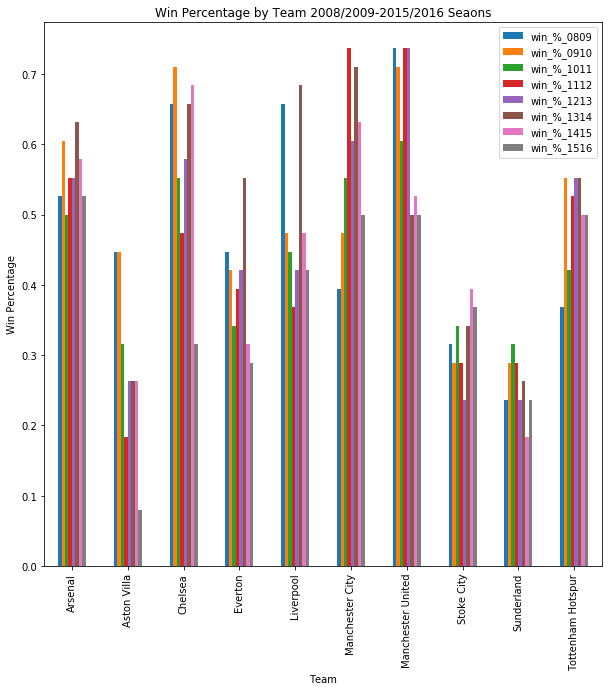

In [22]:
league_data.dropna(inplace=True)
league_data.plot.bar(figsize=(10,10))
plt.xlabel("Team")
plt.ylabel("Win Percentage")
plt.title("Win Percentage by Team 2008/2009-2015/2016 Seaons");

> After looking at the bar chart data I though it would be best to '+/-' the team's win percentage to see how much each team improved compared to their initial season. I graphed the '+/-' in bar chart form to tell who improved the most over the course of the dataset.

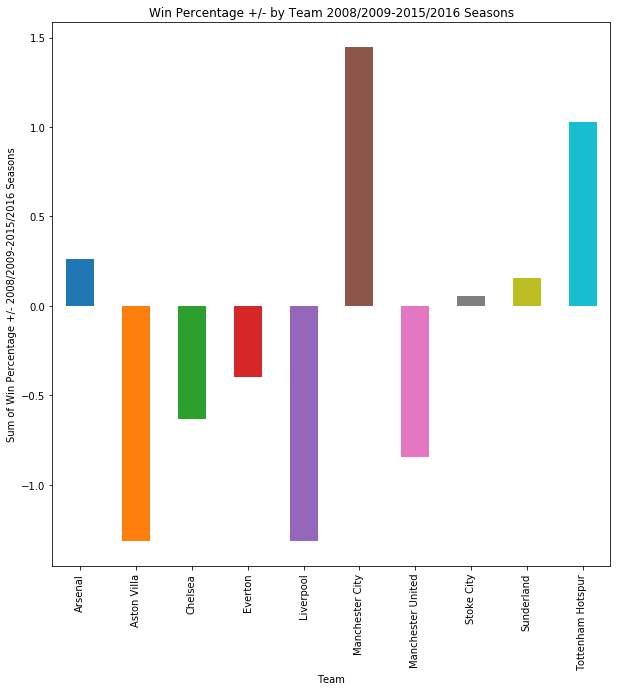

In [23]:
league_data['win_%_+/-_since_0809'] = league_data.sum(axis=1) - (8*league_data['win_%_0809'])
league_data['win_%_+/-_since_0809'].plot.bar(figsize=(10,10))
plt.xlabel("Team")
plt.ylabel("Sum of Win Percentage +/- 2008/2009-2015/2016 Seasons")
plt.title("Win Percentage +/- by Team 2008/2009-2015/2016 Seasons");

> The visual is showing that Manchester City has increased their win percentage the most since the start of the data, meaning they have improved the most over the course of the data.

### Research Question 2: Does scoring the most goals per game lead to winning?

> In order to begin looking at data from the match_results dataframe, I needed to aggregate to get the data I wanted.

In [24]:
goals_home_data = match_results.groupby(["home_team_name"]).home_team_goal.sum()
goals_home_data = pd.DataFrame(goals_home_data)
goals_home_data.head()

,home_team_goal
home_team_name,
Arsenal,306
Aston Villa,179
Birmingham City,38
Blackburn Rovers,98
Blackpool,30


> After the aggregation for the home team match data, I performed the same thing on the away team match data.

In [25]:
goals_away_data = match_results.groupby(["away_team_name"]).away_team_goal.sum()
goals_away_data = pd.DataFrame(goals_away_data)
goals_away_data.index.rename('home_team_name', inplace=True)
goals_away_data.head()

,away_team_goal
home_team_name,
Arsenal,267
Aston Villa,156
Birmingham City,37
Blackburn Rovers,77
Blackpool,25


> I then joined the data and added the goals together to create a cleaner table of total goals by team.

In [26]:
goals_home_data = goals_home_data.join(goals_away_data)
goals_home_data['total_goals'] = goals_home_data['home_team_goal'] + goals_home_data['away_team_goal']
goals_home_data.drop(columns={'home_team_goal', 'away_team_goal'}, inplace=True)
goals_home_data.head()

,total_goals
home_team_name,
Arsenal,573
Aston Villa,335
Birmingham City,75
Blackburn Rovers,175
Blackpool,55


> The next step is to look again at the total games palyed and the total games won.

In [27]:
total_games = match_results['home_team_name'].value_counts() + match_results['away_team_name'].value_counts()
total_games = pd.DataFrame(total_games)
total_games.columns = ['games_played']
total_games.index.rename('home_team_name', inplace=True)
total_games.head()

,games_played
home_team_name,
Arsenal,304
Aston Villa,304
Birmingham City,76
Blackburn Rovers,152
Blackpool,38


> I once again joined the two dataframes together.

In [28]:
total_games['games_won'] = match_results['winning_team'].value_counts()
goals_home_data = goals_home_data.join(total_games)
goals_home_data.head()

,total_goals,games_played,games_won
home_team_name,,,
Arsenal,573,304,170
Aston Villa,335,304,86
Birmingham City,75,76,21
Blackburn Rovers,175,152,42
Blackpool,55,38,10


In [29]:
goals_home_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, Arsenal to Wolverhampton Wanderers
Data columns (total 3 columns):
total_goals     34 non-null int64
games_played    34 non-null int64
games_won       34 non-null int64
dtypes: int64(3)
memory usage: 2.3+ KB


In [30]:
indexNames = goals_home_data[goals_home_data['games_played'] != 304].index
goals_home_data.drop(indexNames, inplace=True)
goals_home_data.head()

,total_goals,games_played,games_won
home_team_name,,,
Arsenal,573,304,170
Aston Villa,335,304,86
Chelsea,583,304,176
Everton,439,304,121
Liverpool,531,304,150


> The next step was to compare and evaluate goals per game and win percentage, in order to eliminate bias or skewed data.

In [31]:
scoring_to_win_data = goals_home_data
scoring_to_win_data.index.rename('team_name', inplace=True)
scoring_to_win_data['goals_per_game'] = scoring_to_win_data['total_goals'] / scoring_to_win_data['games_played']
scoring_to_win_data['win_percentage'] = scoring_to_win_data['games_won'] / scoring_to_win_data['games_played']
scoring_to_win_data.drop(columns={'total_goals', 'games_played', 'games_won'}, inplace=True)
scoring_to_win_data.head()

,goals_per_game,win_percentage
team_name,,
Arsenal,1.884868,0.559211
Aston Villa,1.101974,0.282895
Chelsea,1.917763,0.578947
Everton,1.444079,0.398026
Liverpool,1.746711,0.493421


> The dataframe was put together and cleaned, so I could create a scatterplot for analysis.

In [32]:
scoring_to_win_data['goals_per_game'].describe()

count    10.000000
mean      1.574013
std       0.375693
min       1.059211
25%       1.187500
50%       1.664474
75%       1.907072
max       1.993421
Name: goals_per_game, dtype: float64

> To analyze the goals_per_game column better I used the describe method to see the mean goals and the other quartiles. After doing the describe function it seems there may be some outliers, because the mean is lower than the median

Text(0.5,1,'Goals per game by Team')

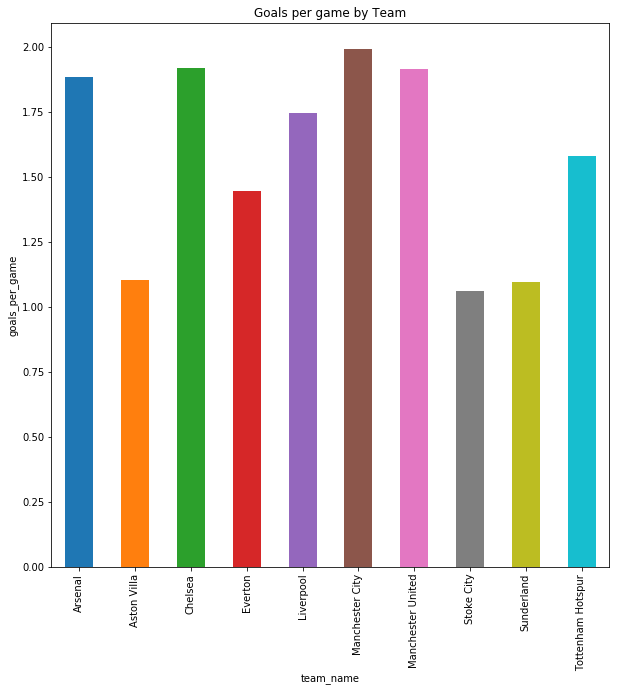

In [33]:
scoring_to_win_data['goals_per_game'].plot.bar(figsize=(10,10))
plt.xlabel('team_name')
plt.ylabel('goals_per_game')
plt.title('Goals per game by Team')

> It seems that Aston Villa, Stoke City, and Sunderland seem to be scoring significantly less goals than the rest of the teams. I want to look solely at the win percentage to see if the same teams stick out as outliers as well.

In [34]:
scoring_to_win_data['win_percentage'].describe()

count    10.000000
mean      0.459539
std       0.135318
min       0.256579
25%       0.341283
50%       0.495066
75%       0.571546
max       0.631579
Name: win_percentage, dtype: float64

Text(0.5,1,'Win Percentage by Team')

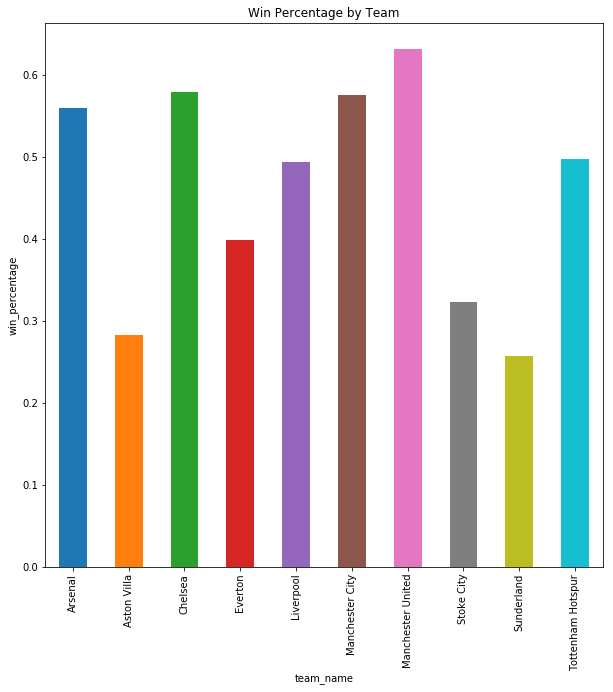

In [35]:
scoring_to_win_data['win_percentage'].plot.bar(figsize=(10,10))
plt.xlabel('team_name')
plt.ylabel('win_percentage')
plt.title('Win Percentage by Team')

> Sunderland, Aston Villa, and Stoke City are outside of a standard deviation on the win percentage and goals per game so I am going to drop them from the data.

In [36]:
scoring_to_win_data.drop("Sunderland", inplace=True)
scoring_to_win_data.drop("Aston Villa", inplace=True)
scoring_to_win_data.drop("Stoke City", inplace=True)

> Dropping these teams will allow for analysis on the more winning teams throughout the league

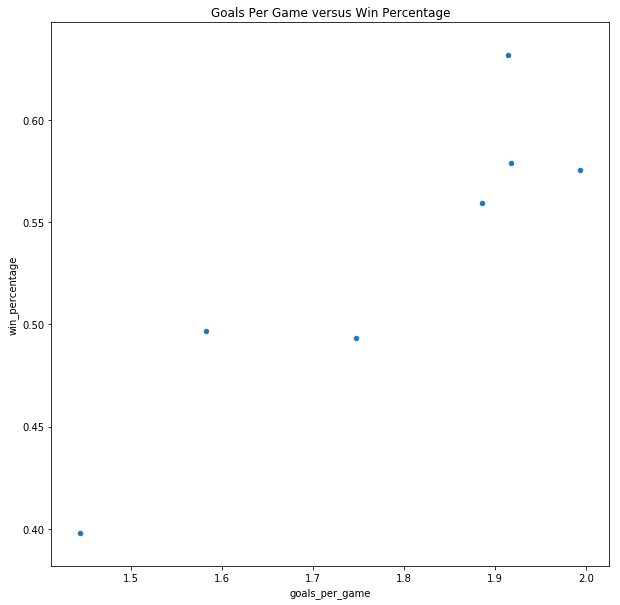

In [37]:
scoring_to_win_data.plot.scatter(x='goals_per_game',y='win_percentage', figsize=(10,10))
plt.title("Goals Per Game versus Win Percentage");

> To better understand the plot, I used seaborn and scipy to fit the data. Once I fit the data and looked through the values I could better understand the relationship of the correlation.

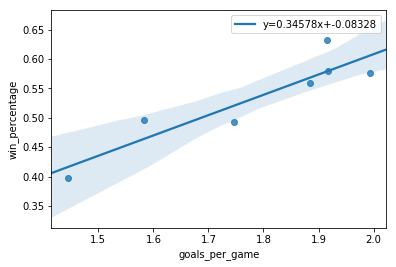

In [38]:
slope, intercept, r_value, p_value, std_err = stats.linregress(scoring_to_win_data['goals_per_game'],
    scoring_to_win_data['win_percentage'])
ax = sns.regplot(x="goals_per_game", y="win_percentage",data=scoring_to_win_data, line_kws={'label':"y={0:.5f}x+{1:.5f}".format(slope,intercept)});
ax.legend()
plt.show()

> The visual about uses linear regression in order to determine the slope of the line, the r value, and the std error. The visual helps analyze the data becuase it shoes the data has a positive linear correlation.

In [39]:
print("The r value is: {}\n".format(r_value), "The standard error is: {}".format(std_err))


The r value is: 0.9121387187910274
 The standard error is: 0.06948776903633198


> The next portion of the visual prints the r value and the standard error. The r value is 0.91 representing a very strong correlation between goals per game and win percentage. The standard error value shows the error for the results are 0.069 which is a small error, meaning the data is accurate and not misrepresenting results.

<a id='conclusions'></a>
## Conclusions

> Which team improved the most over the given data set?
>>I analyzed the data using win percentages over all seaons present to find that Manchester City improved the most. Manchester City managed to rank the highest in the league in finishing above their initial 2008/2009 win percentage each season. The shortcomings of the data, are that not all teams are represented in the data. Teams could have improved at a better rate than Manchester City, but they were left out because they did not participate in the all of the seasons. Another shortcoming of the data is that the results are strictly based on win percentage. Win percetnage is a great metric for improvement, but does not represent the whole picture. Teams could have been losing close games and greatly improved from season to season, but since they did not win their improvement is not reflected in the data analyzed.

> Does scoring more goals per game lead to winning games at a higher rate?
    
>> I analyzed the goals per game versus the win percentage from every team, across all season to find that the teams with more goals per game have a higher winning percentage. After viewing the original scatter plot, I saw a linear trend. Using seaborn and scipy's stats, I used linear regression to fit a line with an r value of 0.912. This r value is positive and very close to one meaning the goals per game strongly correlates to a higher win percentage. The shortcomings of the dataset include the fact that not all teams were counted. Teams that did not play the same number of games over the given dataset were dropped. Another shortcoming is the teams that did not score or win many games were dropped, this allowed for more accurate data, but discounts all the data.


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## OPTIONAL: Question for the reviewer
 
If you have any question about the starter code or your own implementation, please add it in the cell below. 

For example, if you want to know why a piece of code is written the way it is, or its function, or alternative ways of implementing the same functionality, or if you want to get feedback on a specific part of your code or get feedback on things you tried but did not work.

Please keep your questions succinct and clear to help the reviewer answer them satisfactorily. 

> **_Your question_**

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0